<a href="https://colab.research.google.com/github/yseoyoung/python/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 파이참 설치 및 모듈 설치(방법만 알려주심)  
  - 세팅 → Project:이름 → Python Interpreter → +버튼 ‘matplotlib’ 검색 후 설치  
- Json, XML to Pandas
- 워드 클라우드
- 타이타닉.csv 파일 분석 및 시각화

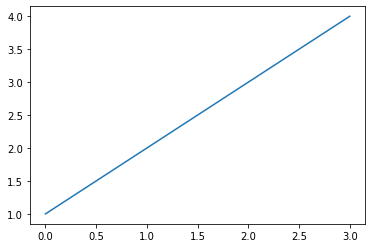

In [56]:
#파이참에서 코드 실행해보기

import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.show()

#JSON 데이터를 Pandas 로 처리

In [57]:
import urllib.request

In [68]:
url = 'https://dapi.kakao.com/v3/search/book' # OpenAPI 서비스 제공 URL
target_param = "target=title" # 전달 인자
page_param = "page=2"         # 전달 인자
query_in = input("검색 질의: ")
query_param = "query=" + urllib.parse.quote(query_in) # utf-8로 인코딩 (open API에서는 표준화해서 서비스)
query_str = url + '?' + target_param + '&' + query_param + '&' + page_param # 쿼리 문자열

print("요청 url:",query_str)
print()
print(">>검색결과")

#urllib.request.urlopen(query_str) #HTTP Error 401: Unauthorized 인증키를 가지고 있지 않으므로 권한이 없음
request = urllib.request.Request(query_str) # 서비스 요청에 사용할 개체를 생성
request.add_header("Authorization", "KakaoAK ee4c503f3cfa3a8198333f0f803f8be3")
response = urllib.request.urlopen(request) # 웹 서버에 요청
res = response.read().decode('utf-8')
print(res) #JSON 방식으로 반환

검색 질의: python
요청 url: https://dapi.kakao.com/v3/search/book?target=title&query=python&page=2

>>검색결과
{"documents":[{"authors":["Michael Beyeler","Joseph Howse","Prateek Joshi"],"contents":"","datetime":"2017-09-01T00:00:00.000+09:00","isbn":"1787125491 9781787125490","price":57000,"publisher":"Packt Publishing","sale_price":57000,"status":"정상판매","thumbnail":"https://search1.kakaocdn.net/thumb/R120x174.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flbook%2Fimage%2F3584628","title":"Opencv: Computer Vision Projects with Python","translators":[],"url":"https://search.daum.net/search?w=bookpage\u0026bookId=3584628\u0026q=Opencv%3A+Computer+Vision+Projects+with+Python"},{"authors":["박병기"],"contents":"『다양한 예제로 배우는 완전 쉬운 파이썬(Python)』은 파이썬을 처음 접하는 사람이 기초를 쉽게 익히고 실무에 응용할 수 있도록 핵심 개념별로 126개의 독립된 항목으로 나누어 각 항목에 최적화된 예제를 풀어보면서 배울 수 있도록 구성했다. 특히, 필자의 현장 교육 경험을 바탕삼아 1:1 개인 지도하듯이 편안한 구어체를 이용하여 지루하지 않게 파이썬을 공부할 수 있도록 배려했다. 또한, 기능을 모두 배운 후 다양한 재미있는 프로그램을 만들어보면서 종합","datetime":"2017-01-30T00:00:00.000+09:00",

In [69]:
import json
jd = json.loads(res)
print(jd) # 위의 결과 = json data 출력

{'documents': [{'authors': ['Michael Beyeler', 'Joseph Howse', 'Prateek Joshi'], 'contents': '', 'datetime': '2017-09-01T00:00:00.000+09:00', 'isbn': '1787125491 9781787125490', 'price': 57000, 'publisher': 'Packt Publishing', 'sale_price': 57000, 'status': '정상판매', 'thumbnail': 'https://search1.kakaocdn.net/thumb/R120x174.q85/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flbook%2Fimage%2F3584628', 'title': 'Opencv: Computer Vision Projects with Python', 'translators': [], 'url': 'https://search.daum.net/search?w=bookpage&bookId=3584628&q=Opencv%3A+Computer+Vision+Projects+with+Python'}, {'authors': ['박병기'], 'contents': '『다양한 예제로 배우는 완전 쉬운 파이썬(Python)』은 파이썬을 처음 접하는 사람이 기초를 쉽게 익히고 실무에 응용할 수 있도록 핵심 개념별로 126개의 독립된 항목으로 나누어 각 항목에 최적화된 예제를 풀어보면서 배울 수 있도록 구성했다. 특히, 필자의 현장 교육 경험을 바탕삼아 1:1 개인 지도하듯이 편안한 구어체를 이용하여 지루하지 않게 파이썬을 공부할 수 있도록 배려했다. 또한, 기능을 모두 배운 후 다양한 재미있는 프로그램을 만들어보면서 종합', 'datetime': '2017-01-30T00:00:00.000+09:00', 'isbn': '8998955954 9788998955953', 'price': 23000, 'publisher': '아티오', 'sale_

In [70]:
import pandas as pd
df = pd.json_normalize(jd['documents']) # Pandas DataFrame 으로 변화 가능
df

,authors,contents,datetime,isbn,price,publisher,sale_price,status,thumbnail,title,translators,url
0,"[Michael Beyeler, Joseph Howse, Prateek Joshi]",,2017-09-01T00:00:00.000+09:00,1787125491 9781787125490,57000,Packt Publishing,57000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Opencv: Computer Vision Projects with Python,[],https://search.daum.net/search?w=bookpage&book...
1,[박병기],『다양한 예제로 배우는 완전 쉬운 파이썬(Python)』은 파이썬을 처음 접하는 사...,2017-01-30T00:00:00.000+09:00,8998955954 9788998955953,23000,아티오,20700,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬(Python)(다양한 예제로 배우는 완전 쉬운),[],https://search.daum.net/search?w=bookpage&book...
2,[프랑소와 숄레],케라스 창시자이자 구글 딥러닝 연구원인 저자는 ‘인공 지능의 민주화’를 강조한다. ...,2018-10-22T00:00:00.000+09:00,1160505977 9791160505979,33000,길벗,29700,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,케라스 창시자에게 배우는 딥러닝(Deep Learning with Python),[박해선],https://search.daum.net/search?w=bookpage&book...
3,"[창병모, 유석종, 이상규]",이 교재는 프로그래밍을 처음 배우는 학생들을 대상으로 C 언어나 Java 언어를 배...,2017-01-17T00:00:00.000+09:00,1159090289 9791159090288,18000,교보문고,17280,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Python 프로그래밍의 이해,[],https://search.daum.net/search?w=bookpage&book...
4,[이진영],가운데 프로그래밍 언어를 이용하여 프로그래밍 개념을 정립하고 이를 바탕으로 문제해결...,2017-08-25T00:00:00.000+09:00,8994044965 9788994044965,21000,서현사,21000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Python 실습으로 기초부터,[],https://search.daum.net/search?w=bookpage&book...
5,"[Bruce Peter, Bruce Andrew, Gedeck Peter]",statistics rarely cover the topic from a data ...,2020-06-09T00:00:00.000+09:00,149207294X 9781492072942,95000,O'Reilly Media,76000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Practical Statistics for Data Scientists,[],https://search.daum.net/search?w=bookpage&book...
6,"[이경택, 방성수, 안상준]","이 책은 딥러닝 기술에 초점을 두고 딥러닝을 구현하기 위해 파이썬을 이용하는데, 머...",2020-10-08T00:00:00.000+09:00,8956748578 9788956748573,25000,정보문화사,22500,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),[],https://search.daum.net/search?w=bookpage&book...
7,[조준모],이를 가공하여 분석할 수 있는 빅데이터 분석기술이 필요하다. 이를 위해 현재 각광을...,2021-02-25T00:00:00.000+09:00,118557879X 9791185578798,26000,인피니티북스,26000,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,빅데이터분석 및 인공지능(Python으로 시작하는)(개정판),[],https://search.daum.net/search?w=bookpage&book...
8,"[폴 데이텔, 하비 데이텔]",미 피어슨(Pearson) 사 특유의 내용의 깊이가 상당한 프로그래밍 언어 고급서 ...,2021-12-23T00:00:00.000+09:00,8931556829 9788931556827,38000,성안당,34200,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,프로그래머를 위한 Python,[안진섭],https://search.daum.net/search?w=bookpage&book...
9,[임일],현재 추천 알고리즘으로 가장 널리 사용되는 협업 필터링(Collaborative F...,2020-08-25T00:00:00.000+09:00,8959727660 9788959727667,18000,청람,16200,정상판매,https://search1.kakaocdn.net/thumb/R120x174.q8...,Python을 이용한 개인화 추천시스템,[],https://search.daum.net/search?w=bookpage&book...


#XML 데이터를 Pandas 로 처리
https://pandas.pydata.org/docs/reference/api/pandas.read_xml.html

In [71]:
url = 'https://openapi.naver.com/v1/search/book.xml' #json 아닌 xml형태로 응답
query_in = input("검색 질의: ") #상세검색이 아닌 그냥 전체 검색
query_param = "query=" + urllib.parse.quote(query_in)
query_str = url + '?' + query_param

print("요청 url:",query_str)
print()
print(">>검색결과")

request = urllib.request.Request(query_str) 
request.add_header("X-Naver-Client-Id", "N2a4UtfAI1_PbVZwB1Of")
request.add_header("X-Naver-Client-Secret", "MbVNScVQ6j")
response = urllib.request.urlopen(request)
res = response.read().decode('utf-8')
print(res)

검색 질의: python
요청 url: https://openapi.naver.com/v1/search/book.xml?query=python

>>검색결과
<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - book ::'python'</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Thu, 03 Mar 2022 12:44:18 +0900</lastBuildDate><total>6941</total><start>1</start><display>10</display><item><title>CODING BASICS &lt;b&gt;PYTHON&lt;/b&gt; (파이썬)</title><link>http://book.naver.com/bookdb/book_detail.php?bid=21508274</link><image>https://bookthumb-phinf.pstatic.net/cover/215/082/21508274.jpg?type=m1&amp;udate=20220208</image><author>김상민|장성식|김일태</author><price>20000</price><discount>18000</discount><publisher>렉스미디어닷넷</publisher><pubdate>20220210</pubdate><isbn>8959604216 9788959604210</isbn><description>파이썬으로 다지는 프로그래밍의 기초ㆍ 다양한 예제를 활용하여 초보자도 쉽게 프로그래밍의 기본을 익힐 수 있는 파이썬 입문서입니다.ㆍ 문법을 사전식으로 나열하지 않고 기능적인 프로그램을 하나씩 완성하면서 익힐 수 있게 구성했습니다.ㆍ 단계별로 완성하는 장별 예제 및 연습문제를 바탕으로... </description><

In [72]:
df = pd.read_xml(res,xpath=".//item") # 가져오고 싶은 사항 작성 -> 구조를 전체적으로 보고 싶다면, xml 파일을 생성하여 웹으로 확인해보기
df

,title,link,image,author,price,discount,publisher,pubdate,isbn,description
0,CODING BASICS <b>PYTHON</b> (파이썬),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/215/...,김상민|장성식|김일태,20000,18000.0,렉스미디어닷넷,20220210,8959604216 9788959604210,파이썬으로 다지는 프로그래밍의 기초ㆍ 다양한 예제를 활용하여 초보자도 쉽게 프로그래...
1,<b>Python</b>을 이용한 개인화 추천 시스템,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/166/...,임일,18000,17640.0,청람,20200825,8959727660 9788959727667,현재 추천 알고리즘으로 가장 널리 사용되는 협업 필터링(COLLABORATIVE F...
2,"파이썬으로 배우는 게임 개발 (닷잇 액션, 탄막 슈팅, 맵 에티터,장애물 피하기,실전편)",http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/173/...,히로세 츠요시,30000,27000.0,제이펍,20201120,119066545X 9791190665452,『파이썬으로 배우는 게임 개발: 실전편』은 입문편보다 보다 수준 높은 게임 개발 테...
3,프로그래머를 위한 <b>Python</b>,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/213/...,폴 데이텔|하비 데이텔,38000,34200.0,성안당,20211223,8931556829 9788931556827,사의 ‘<b>PYTHON</b> FOR PROGRAMMERS’가 오랜만에 번역판으로...
4,처음 만나는 AI 수학 with <b>Python</b> (한 권으로 배우는 인공지...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/177/...,아즈마 유키나가,23000,20700.0,영진닷컴,20210115,8931463375 9788931463378,인공지능을 공부하는데 필요한 기초 수학개념을 한 권에 모았다!〈처음 만나는 AI 수...
5,きれいな<b>Python</b>プログラミング,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/215/...,AlSweigart 岡田 佑一,46580,46140.0,マイナビ出版,20220228,4839977402 9784839977405,None
6,<b>Python</b>最速デ-タ收集術,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/214/...,淸水 義孝,25320,25320.0,技術評論社,20220228,4297126419 9784297126414,None
7,<b>Python</b> for Cybersecurity,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/214/...,Howard E. Poston|III,22000,NaN,Wiley,20220201,1119850657 9781119850656,Discover an up-to-date and authoritative explo...
8,<b>Python</b>으로 배우는 문제해결과 인공지능,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/180/...,김현정|오경선,23000,22540.0,인피니티북스,20210225,1185578811 9791185578811,컴퓨팅 사고는 자신의 영역에 컴퓨터과학 원리와 개념을 활용하여 논리적으로 풀어낼 수...
9,Introduction to Digital Music with <b>Python</...,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/219/...,"Horn, Michael|West, Melanie|Roberts, Cameron",64960,58460.0,FocalPress,20220207,0367470829 9780367470821,None


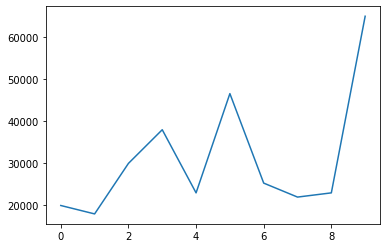

In [73]:
import matplotlib.pyplot as plt
df.price.plot() # 위의 검색 결과의 가격을 그래프로 시각화 가능
plt.show()

In [75]:
des_str = df.description[0] # 텍스트도 추출 가능
des_str
# 해당 자료들에서 우리가 원하는 텍스트만 추출하는 것 = '텍스트 마이닝'(Text Mining)

'파이썬으로 다지는 프로그래밍의 기초ㆍ 다양한 예제를 활용하여 초보자도 쉽게 프로그래밍의 기본을 익힐 수 있는 파이썬 입문서입니다.ㆍ 문법을 사전식으로 나열하지 않고 기능적인 프로그램을 하나씩 완성하면서 익힐 수 있게 구성했습니다.ㆍ 단계별로 완성하는 장별 예제 및 연습문제를 바탕으로...'

#워드 클라우드
텍스트 마이닝의 주제 중 하나. 주요 키워드의 추출  
-> 우리에게 필요한 것 : 영문 알파벳, 한글, 숫자 (특수기호 등등 X)

In [76]:
demo_str = "abc 123 cas$ asd# cr"
target_str = ""
print("방법1===================")
for ch in demo_str:
  if ch.isalnum() or ch.isspace(): # isalnum() : 문자나 숫자인지 검사, isspace() : 공백이 포함되어 있으면 True, 아니면 False
    target_str = target_str + ch
print(target_str)

print("\n방법2===================")
target_str = "".join(char for char in demo_str if (char.isalnum() or char.isspace())) # 한 줄 코드
print(target_str)

방법1===================
abc 123 cas asd cr

방법2===================
abc 123 cas asd cr


In [77]:
filter_str = "".join( char for char in des_str if(char.isalnum() or char.isspace()) and char !='ㆍ')
print(filter_str)
print("======온전한 글자만 추출 완료=======\n")

words = filter_str.split(' ') # 공백 기준으로 분할
s = pd.Series(words)
s.value_counts() # 각 단어의 분포 수를 셀 수 있다

파이썬으로 다지는 프로그래밍의 기초 다양한 예제를 활용하여 초보자도 쉽게 프로그래밍의 기본을 익힐 수 있는 파이썬 입문서입니다 문법을 사전식으로 나열하지 않고 기능적인 프로그램을 하나씩 완성하면서 익힐 수 있게 구성했습니다 단계별로 완성하는 장별 예제 및 연습문제를 바탕으로
======온전한 글자만 추출 완료=======



프로그래밍의    2
수         2
익힐        2
파이썬으로     1
구성했습니다    1
프로그램을     1
하나씩       1
완성하면서     1
있게        1
단계별로      1
않고        1
완성하는      1
장별        1
예제        1
및         1
연습문제를     1
기능적인      1
사전식으로     1
나열하지      1
다지는       1
문법을       1
입문서입니다    1
파이썬       1
있는        1
기본을       1
쉽게        1
초보자도      1
활용하여      1
예제를       1
다양한       1
기초        1
바탕으로      1
dtype: int64

In [78]:
from wordcloud import WordCloud

In [79]:
src = """
Python is an easy to learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms.

The Python interpreter and the extensive standard library are freely available in source or binary form for all major platforms from the Python web site, https://www.python.org/, and may be freely distributed. The same site also contains distributions of and pointers to many free third party Python modules, programs and tools, and additional documentation.

The Python interpreter is easily extended with new functions and data types implemented in C or C++ (or other languages callable from C). Python is also suitable as an extension language for customizable applications.
"""

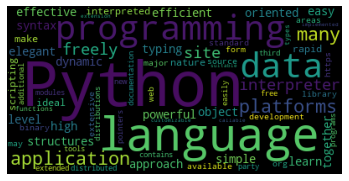

{'Python': 1.0,
 'additional': 0.125,
 'application': 0.25,
 'approach': 0.125,
 'areas': 0.125,
 'available': 0.125,
 'binary': 0.125,
 'callable': 0.125,
 'contains': 0.125,
 'customizable': 0.125,
 'data': 0.25,
 'development': 0.125,
 'distributed': 0.125,
 'distributions': 0.125,
 'documentation': 0.125,
 'dynamic': 0.125,
 'easily': 0.125,
 'easy': 0.125,
 'effective': 0.125,
 'efficient': 0.125,
 'elegant': 0.125,
 'extended': 0.125,
 'extension': 0.125,
 'extensive': 0.125,
 'form': 0.125,
 'free': 0.125,
 'freely': 0.25,
 'functions': 0.125,
 'high': 0.125,
 'https': 0.125,
 'ideal': 0.125,
 'implemented': 0.125,
 'interpreted': 0.125,
 'interpreter': 0.25,
 'language': 0.5,
 'learn': 0.125,
 'level': 0.125,
 'library': 0.125,
 'major': 0.125,
 'make': 0.125,
 'many': 0.25,
 'may': 0.125,
 'modules': 0.125,
 'nature': 0.125,
 'new': 0.125,
 'object': 0.125,
 'org': 0.125,
 'oriented': 0.125,
 'party': 0.125,
 'platforms': 0.25,
 'pointers': 0.125,
 'powerful': 0.125,
 'program

In [81]:
wc = WordCloud()
wc.generate(src) # 형태소 별로 분리하여 빈도수가 높은 것은 면적을 크게 설정하여 시각화
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

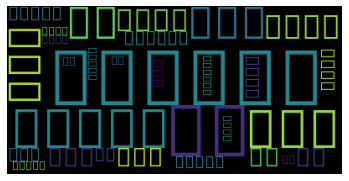

{'구성했습니다': 0.5,
 '기능적인': 0.5,
 '기본을': 0.5,
 '기초': 0.5,
 '나열하지': 0.5,
 '다양한': 0.5,
 '다지는': 0.5,
 '단계별로': 0.5,
 '문법을': 0.5,
 '바탕으로': 0.5,
 '사전식으로': 0.5,
 '쉽게': 0.5,
 '않고': 0.5,
 '연습문제를': 0.5,
 '예제': 0.5,
 '예제를': 0.5,
 '완성하는': 0.5,
 '완성하면서': 0.5,
 '익힐': 1.0,
 '입문서입니다': 0.5,
 '있게': 0.5,
 '있는': 0.5,
 '장별': 0.5,
 '초보자도': 0.5,
 '파이썬': 0.5,
 '파이썬으로': 0.5,
 '프로그래밍의': 1.0,
 '프로그램을': 0.5,
 '하나씩': 0.5,
 '활용하여': 0.5}

In [82]:
wc=WordCloud()
wc.generate(filter_str)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

In [27]:
!sudo apt-get install -y fonts-nanum # 한글 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [83]:
import matplotlib.font_manager as fm # 워드 클라우드에 한글 폰트를 적용하기 위하여 경로를 알아야 한다.
sf = fm.findSystemFonts()
[f for f in sf if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

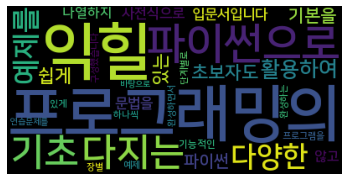

{'구성했습니다': 0.5,
 '기능적인': 0.5,
 '기본을': 0.5,
 '기초': 0.5,
 '나열하지': 0.5,
 '다양한': 0.5,
 '다지는': 0.5,
 '단계별로': 0.5,
 '문법을': 0.5,
 '바탕으로': 0.5,
 '사전식으로': 0.5,
 '쉽게': 0.5,
 '않고': 0.5,
 '연습문제를': 0.5,
 '예제': 0.5,
 '예제를': 0.5,
 '완성하는': 0.5,
 '완성하면서': 0.5,
 '익힐': 1.0,
 '입문서입니다': 0.5,
 '있게': 0.5,
 '있는': 0.5,
 '장별': 0.5,
 '초보자도': 0.5,
 '파이썬': 0.5,
 '파이썬으로': 0.5,
 '프로그래밍의': 1.0,
 '프로그램을': 0.5,
 '하나씩': 0.5,
 '활용하여': 0.5}

In [85]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareB.ttf')
wc.generate(filter_str)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)  
- tf(d,t) : 특정 문서 d 에서의 특정 단어 t 의 등장 횟수
- df(t) : 특정 단어 t가 등장한 문서의 수.  

위에 따라 가중치를 두어 점수를 매긴다. 시맨틱 검색에 가장 기본이 되는 알고리즘이다.

# train_titanic.csv 파일 내용 분석 실습 

1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?

2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.

3. 결측데이터가 있는 컬럼들을 조사하시오.

4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

8. 성별로 분포를 파이 그래프로 나타내시오.

9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

10. 나이를 5살 범위로 17단계로(0살 이상 ~ 5살 미만, 5살 이상 ~ 10살 미만,...,80 ~ 85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)

11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)

17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [86]:
path = '/content/drive/MyDrive/train_titanic.csv'
data = pd.read_csv(path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
print('train data shape: ', data.shape)
print('----------[train infomation]----------')
print(data.info())

train data shape:  (891, 12)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [89]:
# 1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?
sur_data = data['Survived']
surv = data['Survived'].value_counts()

#풀이
print("사망자 수:",surv[0],"명, 생존자 수:",surv[1],"명")
print()

#강사 해설
print(f"승선 인원: {surv.count()}명, 사망자 수: {surv.values[0]}명, 생존자 수: {surv.values[1]}명")

사망자 수: 549 명, 생존자 수: 342 명

승선 인원: 2명, 사망자 수: 549명, 생존자 수: 342명


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


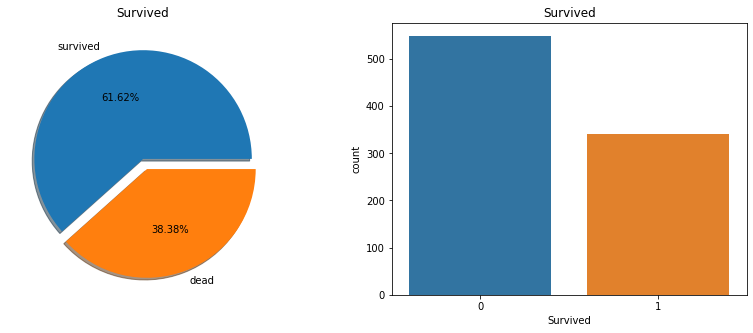

In [91]:
# 2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.

#풀이
labels = ['survived', 'dead']
f,ax = plt.subplots(1,2,figsize=(14,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0], labels=labels, shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

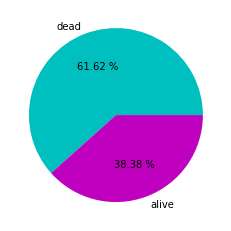

In [127]:
labels = ['dead','alive']
plt.pie(surv,labels=labels, autopct ="%.2f %%", colors=['c','m'])
plt.show()

In [92]:
# 3. 결측데이터가 있는 컬럼들을 조사하시오.

print('----------[train infomation]----------')
print(data.info())
print("\n==> Age, Cabin,Embarked 에 결측 데이터 존재")

----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

==> Age, Cabin,Embarked 에 결측 데이터 존재


In [93]:
data['Age'].isnull().value_counts() # [0]은 False 데이터(결측데이터 아님), [1]인 True가 결측데이터

False    714
True     177
Name: Age, dtype: int64

In [94]:
data['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [46]:
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

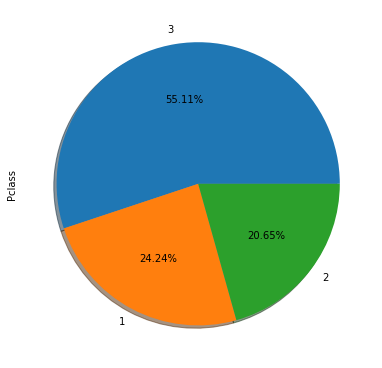

In [95]:
# 4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

#풀이
fig, ax = plt.subplots(figsize=(12,5), constrained_layout=True)
data['Pclass'].value_counts().plot.pie(shadow=True, autopct='%.2f%%')
plt.show()

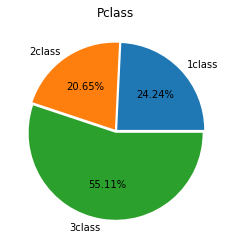

In [128]:
#강사 해설
#value_counts()는 빈도 순으로 정렬되므로 index순으로 정렬시켜준다
labels = ['1class','2class','3class']
dvc = data.Pclass.value_counts().sort_index() # data.['Pclass']랑 같은 표현
plt.pie(dvc.values, labels=labels, autopct="%.2f%%", explode=[0.02,0.02,0.02])
plt.title("Pclass")
plt.show()

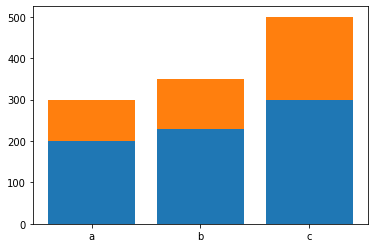

In [97]:
names = ['a','b','c']
income1 = [200,230,300]
income2 = [100,120,200]
plt.bar(names,income1)
plt.bar(names,income2,bottom=income1) #income1을 아래에 깔고 그 위 income2 만큼 추가된 값이 쌓임
plt.show()

In [50]:
import numpy as np

In [130]:
pdata = data.Pclass
pdata.unique()

array([3, 1, 2])

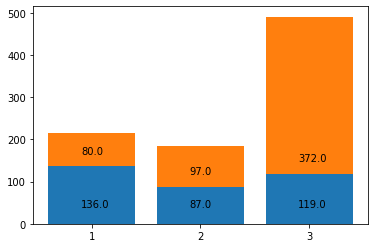

In [98]:
# 5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

pdata = data.Pclass
cn = len(pdata.unique())
pc_alive_arr = np.zeros(cn) # 초기값 0 설정 -> 카운팅을 넣어줄 것
pc_dead_arr = np.zeros(cn)

for index in range(len(pdata)):
  pi = pdata[index]-1 # Pclass는 1,2,3 이므로 -1 하여 인덱스값 0,1,2로 변환
  if sur_data[index]==0: #사망자인 경우 카운트 +1
    pc_dead_arr[pi]+=1
  else: #생존자인 경우 카운트 +1
    pc_alive_arr[pi]+=1
#pc_alive_arr, pc_dead_arr

labels = ['1','2','3']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(cn):
  plt.annotate(str(pc_alive_arr[i]),(-0.1+i,40))
  plt.annotate(str(pc_dead_arr[i]),(-0.1+i,pc_alive_arr[i]+30))
plt.show()

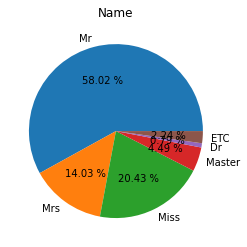

In [102]:
## 6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

names_values = ['Mr','Mrs','Miss','Master','Dr','ETC']
def get_name_index(name):
  first,second = name.split(',') #콤마를 기준으로 분리
  foos = second.split('.') #점을 기준으로 분리
  tn = foos[0].replace(' ','') #공백을 제거
  for index,nv in enumerate(names_values):
    if nv == tn:
      return index
  return 5

n_cnts = np.zeros(6)
for i,name in enumerate(data.Name):
  ni = get_name_index(name)
  n_cnts[ni]+=1

plt.pie(n_cnts,labels=names_values,autopct="%.2f %%")
plt.title("Name")
plt.show()


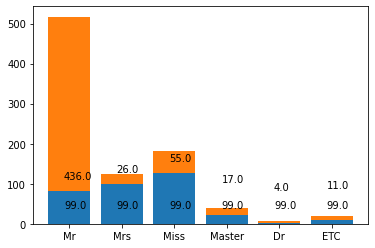

In [106]:
# 7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

pn_alive_arr=np.zeros(6)
pn_dead_arr=np.zeros(6)
for i,name in enumerate(data.Name):
  ni=get_name_index(name)
  if sur_data[i]==0:
    pn_dead_arr[ni]+=1
  else:
    pn_alive_arr[ni]+=1
plt.bar(names_values, pn_alive_arr)
plt.bar(names_values, pn_dead_arr, bottom=pn_alive_arr)

for i in range(6):
  plt.annotate(str(pn_alive_arr[1]),(-0.1+i,40))
  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i,pn_alive_arr[i]+80))
  else:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i,pn_alive_arr[i]+30))
plt.show()

In [107]:
import matplotlib.font_manager as fm
sf = fm.findSystemFonts()
[f for f in sf if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

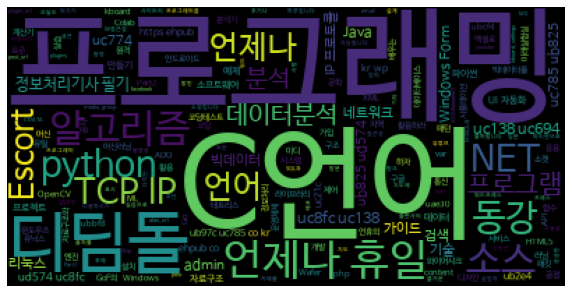

{'62204faead4e3': 0.07142857142857142,
 'ADO': 0.14285714285714285,
 'API': 0.14285714285714285,
 'CDATA': 0.07142857142857142,
 'Colab': 0.14285714285714285,
 'C언어': 1.0,
 'Escort': 0.35714285714285715,
 'Go': 0.14285714285714285,
 'GoF의': 0.14285714285714285,
 'HTML5': 0.14285714285714285,
 'IP 프로토콜': 0.2857142857142857,
 'Java': 0.2857142857142857,
 'ML': 0.14285714285714285,
 'MS': 0.07142857142857142,
 'MSSQL과': 0.07142857142857142,
 'NET': 0.42857142857142855,
 'OpenCV': 0.14285714285714285,
 'Part1': 0.07142857142857142,
 'Part2': 0.14285714285714285,
 'SQL과': 0.07142857142857142,
 'Skip': 0.07142857142857142,
 'TCP IP': 0.42857142857142855,
 'UI 자동화': 0.21428571428571427,
 'WPF': 0.14285714285714285,
 'Wafer': 0.14285714285714285,
 'Windows': 0.14285714285714285,
 'Windows Form': 0.2857142857142857,
 'W접근성': 0.07142857142857142,
 'XML': 0.14285714285714285,
 'admin': 0.2857142857142857,
 'ajax': 0.07142857142857142,
 'alax_url': 0.07142857142857142,
 'co kr': 0.2142857142857142

In [109]:
from bs4 import BeautifulSoup
url = 'https://ehpub.co.kr' #사이트 주소

response = urllib.request.urlopen(url) #웹 서버에 요청
res= response.read().decode('utf-8')

hre = BeautifulSoup(res,'html.parser')

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate(hre.body.text)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

#웹페이지 전체 가져오는 것 : 웹 크롤링
#원하는 부분만 뽑아오는 것 : 웹 스크레이핑

In [117]:
# 8. 성별로 분포를 파이 그래프로 나타내시오.
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

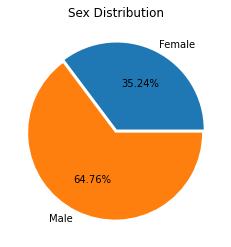

In [121]:
svc = data.Sex.value_counts().sort_index()
plt.pie(svc.values, labels=['Female','Male'], autopct="%.2f%%",explode=[0.02,0.02])
plt.title("Sex Distribution")
plt.show()

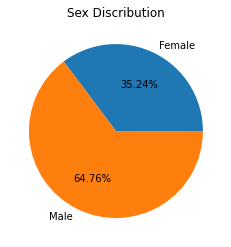

In [120]:
# 8. 성별로 분포를 파이 그래프로 나타내시오.
sex_values = ['Female','Male']
def get_sex_index(sex):
  if sex == 'female':
    return 0
  return 1

s_cnts = np.zeros(2)
for i,sex in enumerate(data.Sex):
  si = get_sex_index(sex)
  s_cnts[si]+=1

plt.pie(s_cnts,labels=sex_values,autopct="%.2f%%")
plt.title("Sex Discribution")
plt.show()

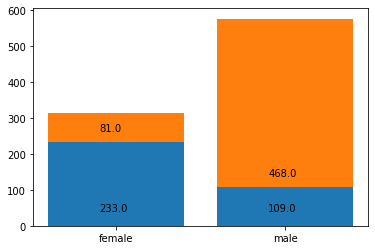

In [119]:
# 9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

import numpy as np
sdata = data.Sex
sn = len(sdata.unique())
ps_alive_arr= np.zeros(sn)
ps_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
  if sdata[index] == 'female':
    si = 0
  else:
    si = 1
  if sur_data[index]==0:#사망한 승객일 때
    ps_dead_arr[si]+=1
  else: #생존한 승객일 때
    ps_alive_arr[si]+=1

labels=['female','male']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
for i in range(sn):
  plt.annotate(str(ps_alive_arr[i]),(-0.1+i,40))
  plt.annotate(str(ps_dead_arr[i]),(-0.1+i,ps_alive_arr[i]+30))
plt.show()

In [134]:
# 10. 나이를 5살 범위로 17단계로(0~5, 5~10,...,80~85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)

#data.Age.isnull().value_counts() 결측 데이터 확인
mv = data.Age.mean() #평균
ad = data.Age.fillna(mv) #결측치 수정
ad.isnull().value_counts() #확인

False    891
Name: Age, dtype: int64

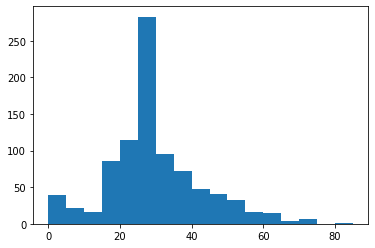

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

In [142]:
#히스토그램 이용
n, _, _ = plt.hist(ad,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
plt.show()
n
#n : 인원수
#bins : 구간
#patches : 분포수 열거할 때

In [147]:
#알고리즘 이용
age_values = np.zeros(17)
for i,age in enumerate(ad):
  ai = age//5
  ai = int(ai)
  age_values[ai]+=1
age_values

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

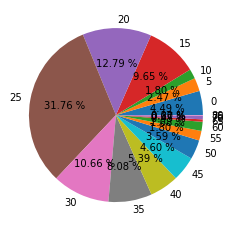

In [149]:
#파이그래프
plt.pie(age_values,labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80'],autopct="%.2f %%")
plt.show()

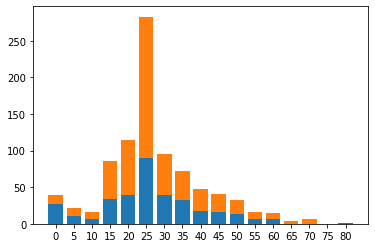

00 ~ 05: 040
05 ~ 10: 022
10 ~ 15: 016
15 ~ 20: 086
20 ~ 25: 114
25 ~ 30: 283
30 ~ 35: 095
35 ~ 40: 072
40 ~ 45: 048
45 ~ 50: 041
50 ~ 55: 032
55 ~ 60: 016
60 ~ 65: 015
65 ~ 70: 004
70 ~ 75: 006
75 ~ 80: 000
80 ~ 85: 001


In [153]:
# 11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

ps_alive_arr= np.zeros(17)
ps_dead_arr = np.zeros(17)
for index in range(len(ad)):
  ai = ad[index]//5
  ai = int(ai)

  if sur_data[index]==0:#사망한 승객일 때
    ps_dead_arr[ai]+=1
  else: #생존한 승객일 때
    ps_alive_arr[ai]+=1

labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
plt.show()
for i in range(17):
  print(f"{i*5:02d} ~ {(i+1)*5:-02d}: {age_values[i]:03.0f}")

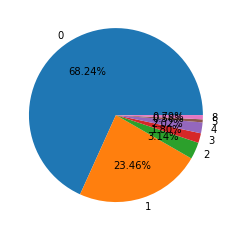

In [157]:
# 12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

svc = data.SibSp.value_counts().sort_index()
plt.pie(svc.values, labels=svc.index, autopct="%.2f%%")
plt.show()

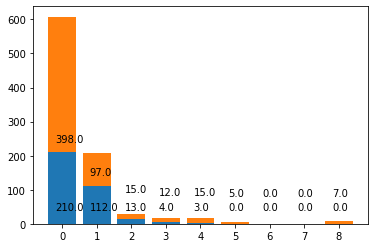

In [155]:
# 13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

sdata = data.SibSp
sn = 9 #형제 자매 수를 인덱스로 사용하기 위해서 0~8까지 9개를 사용
sc_alive_arr = np.zeros(sn)
sc_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
  si = sdata[index] #형제 자매수를 얻어온다.
  if sur_data[index] == 0: #죽은 승객일 때
    sc_dead_arr[si]+=1
  else: #생존 승객일 때
    sc_alive_arr[si]+=1

labels = [str(i) for i in range(9)]
plt.bar(labels,sc_alive_arr)
plt.bar(labels,sc_dead_arr,bottom=sc_alive_arr)
for i in range(sn):
  plt.annotate(str(sc_alive_arr[i]),(-0.2+i,40))
  if sc_alive_arr[i]<40:
    plt.annotate(str(sc_dead_arr[i]),(-0.2+i,sc_alive_arr[i]+80))
  else:
    plt.annotate(str(sc_dead_arr[i]),(-0.2+i,sc_alive_arr[i]+30))
plt.show()

평균, MSE, 벡터, 행렬, 중심경향성, 산포도, 상관관계, 심슨의 역설, 종속성과 독립성, 조건부 확률, 베이즈, 확률 변수, 연속 분포, 정규 분포, 중심 극한 정리, 통계적 가설 검정, p-value, 신뢰구간, p 해킹, A/B 테스트, 경사하강법, KNN, KMeans, 로지스틱 회귀